In [3]:
df.country.unique()

array(['Arab World', 'World',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia (excluding high income)', 'South Asia',
       'Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Albania', 'Armenia', 'Angola', 'Argentina',
       'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan',
       'Central Europe and the Baltics', 'Bosnia and Herzegovina',
       'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria',
       'Bahrain', 'Burundi', 'Benin', 'Bermuda', 'Brunei Darussalam',
       'Bolivia', 'Brazil', 'Bahamas, The', 'Bhutan', 'Botswana',
       'Belarus', 'Belize', 'Canada', 'Congo, Dem. Rep.',
       'Central African Republic', 'Congo, Rep.', 'Switzerland',
       "Cote d'Ivoire", 'Chile', 'Cameroon', 'China', 'Colombia',
       'Costa Rica', 'Cuba', 'Cabo Verde', 'Curacao', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic',
       'Algeria', 'Ecuador',

# GDP Europe, America, East Asia, North Africa

In [4]:
regions1 = ['European Union', 'North America', 'East Asia & Pacific', 
       'Latin America & Caribbean', 'Middle East & North Africa']

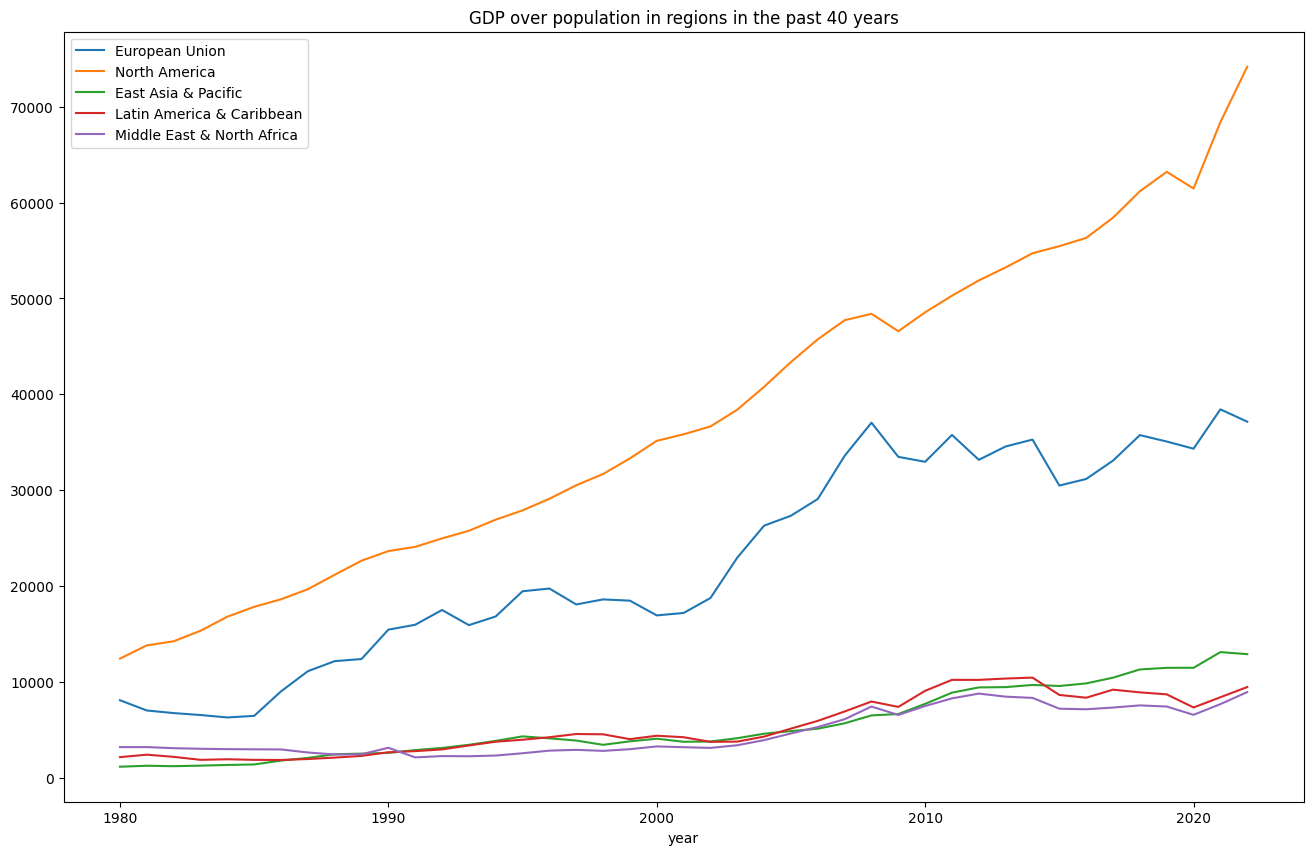

In [5]:
plt.figure(figsize=(16,10))
for region in regions1:
    df[df["country"] == region].groupby("year")["gdp_over_pop"].sum().plot()
plt.title("GDP over population in regions in the past 40 years")
plt.legend(regions1)
plt.show()

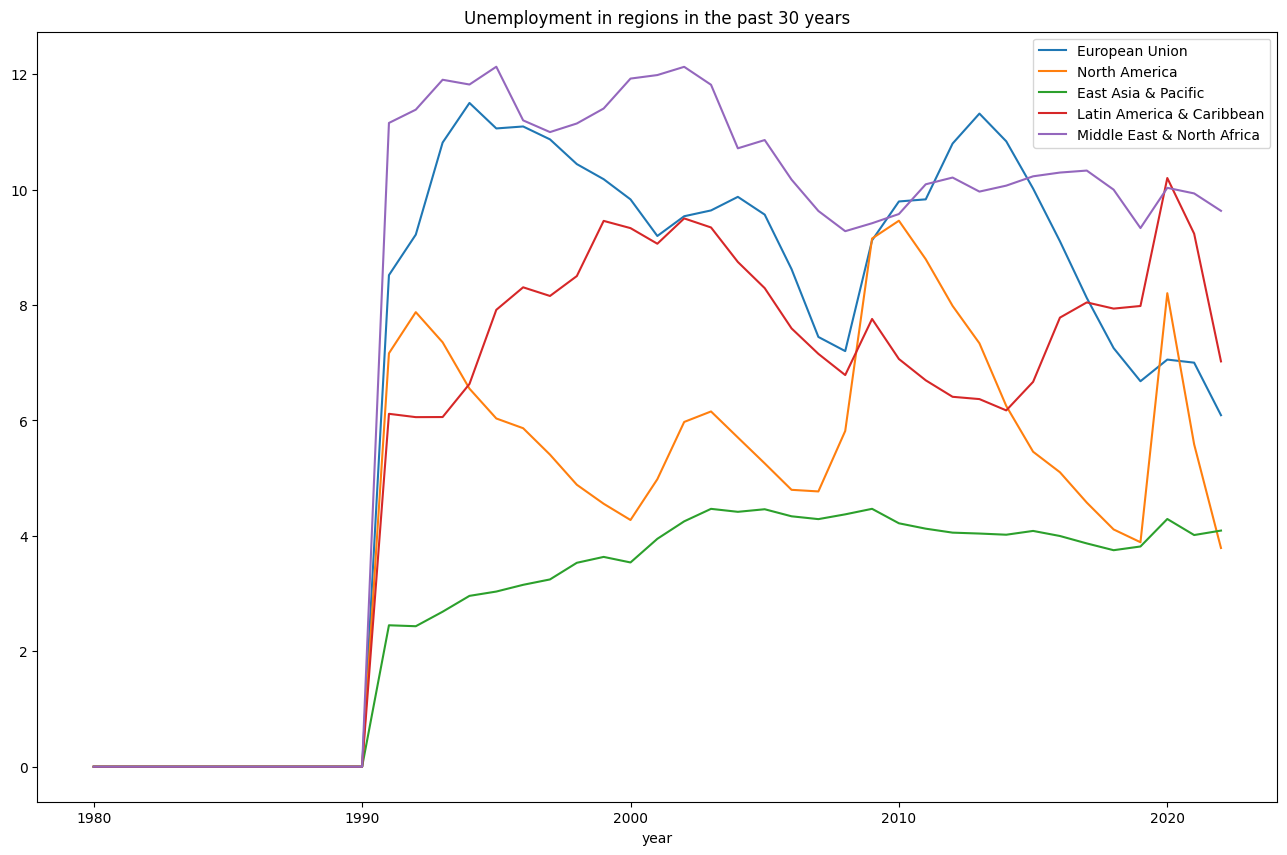

In [6]:
plt.figure(figsize=(16,10))
for region in regions1:
    df[df["country"] == region].groupby("year")["unemployment_r"].sum().plot()
plt.title("Unemployment in regions in the past 30 years")
plt.legend(regions1)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11560 entries, 0 to 11559
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   iso2c                          11395 non-null  object 
 1   year                           11560 non-null  int64  
 2   country                        11560 non-null  object 
 3   iso3c                          11345 non-null  object 
 4   pop                            11507 non-null  float64
 5   labor_force                    7861 non-null   float64
 6   gdp_ppp_c                      7774 non-null   float64
 7   gdp_ppp                        7816 non-null   float64
 8   gdp                            10322 non-null  float64
 9   gdp_c                          10078 non-null  float64
 10  unemployment_r                 7623 non-null   float64
 11  pop_over_65                    11517 non-null  float64
 12  working_age_pop_pct            2236 non-null  

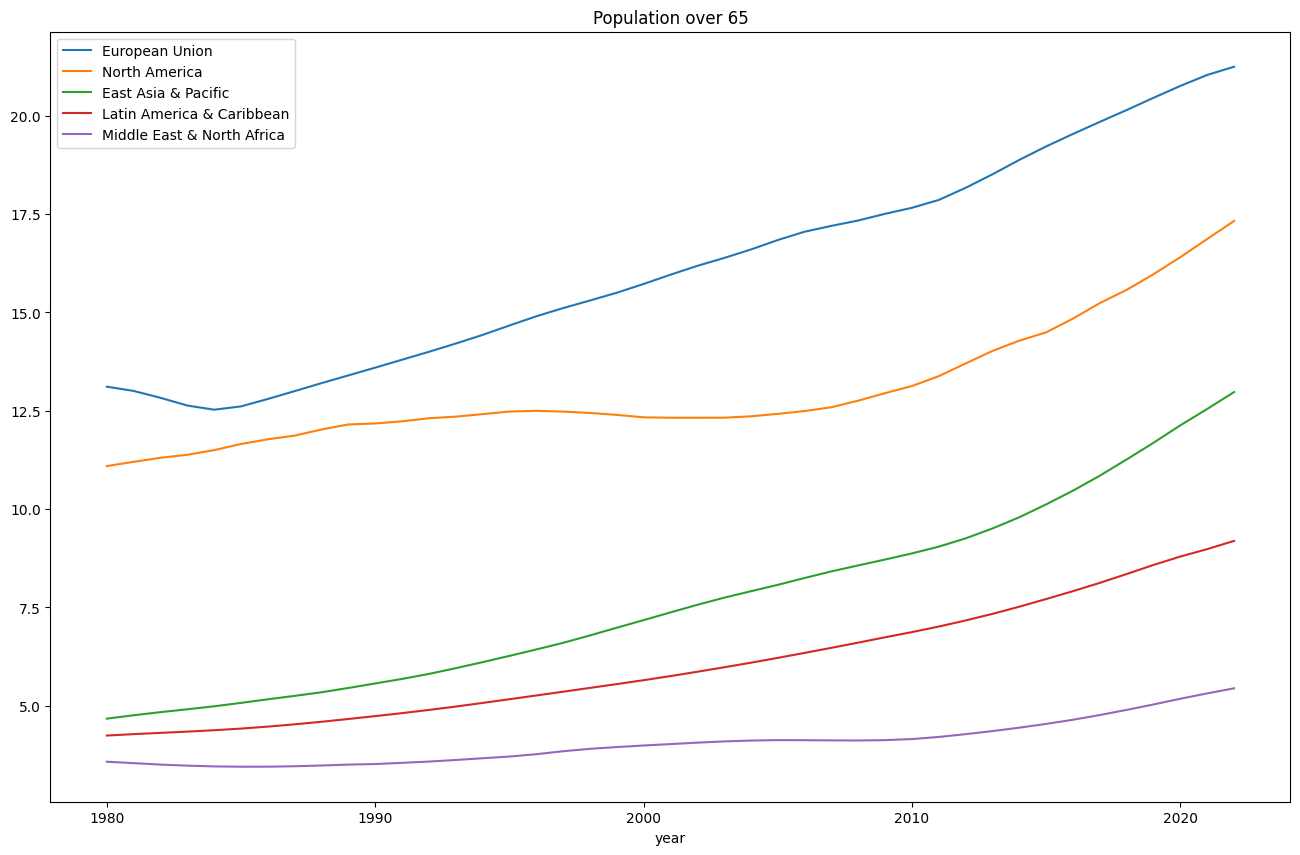

In [8]:
plt.figure(figsize=(16,10))
for region in regions1:
    df[df["country"] == region].groupby("year")["pop_over_65"].sum().plot()
plt.title("Population over 65")
plt.legend(regions1)
plt.show()

# Europe and Central Europe

In [9]:
europe = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
          "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", 
          "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", 
          "Ireland", "Italy", "Kazakhstan", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", 
          "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
          "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", 
          "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Armenia", "Azerbaijan", "Georgia", "Russia", "Turkiye"]

central_e = ["Austria", "Czechia", "Germany", "Hungary", "Poland", "Slovakia"]

rich_e = df[df["country"].isin(europe)].groupby("country")["gdp_over_pop"].max().sort_values(ascending=False).reset_index().head(30)

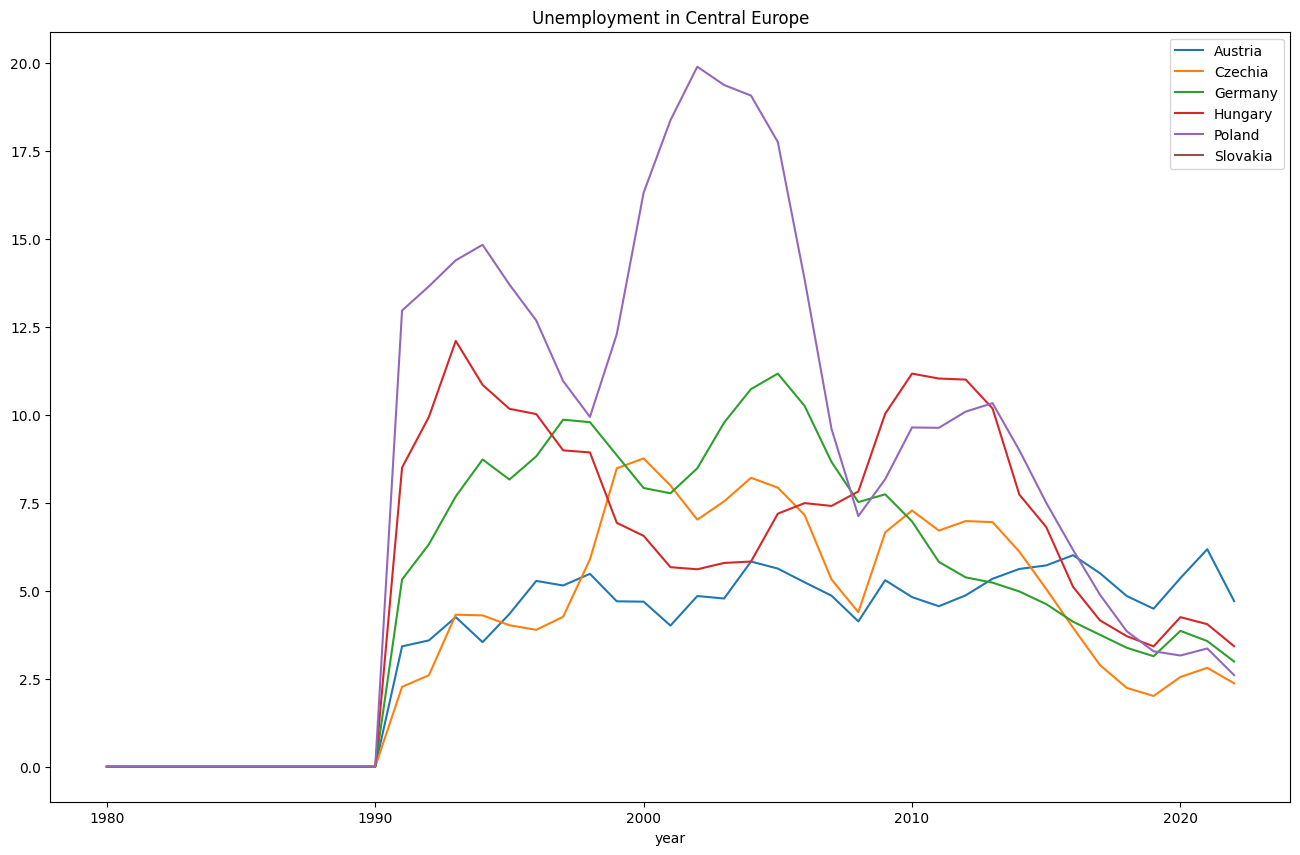

In [10]:
plt.figure(figsize=(16,10))
for region in central_e:
    df[df["country"] == region].groupby("year")["unemployment_r"].sum().plot()
plt.title("Unemployment in Central Europe")
plt.legend(central_e)
plt.show()

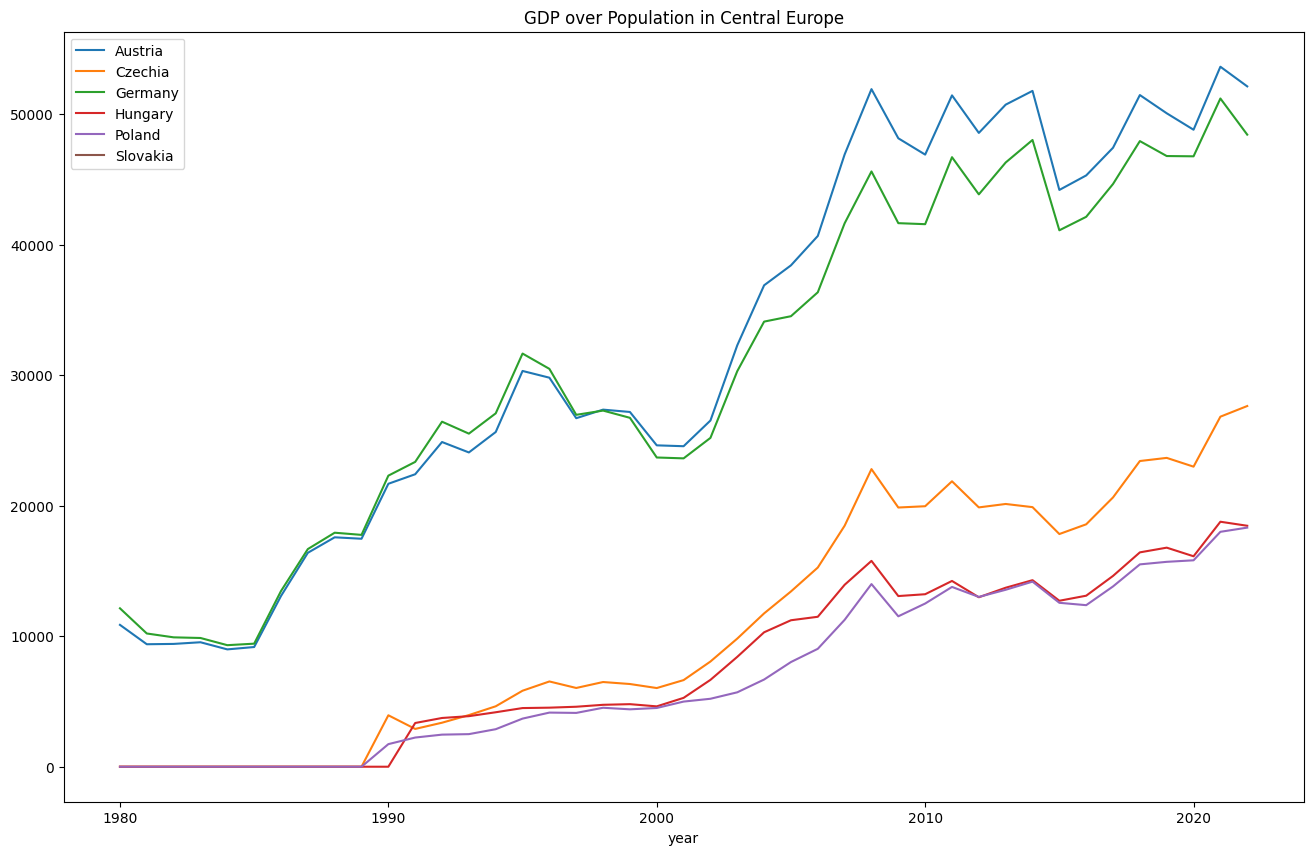

In [11]:
plt.figure(figsize=(16,10))
for region in central_e:
    df[df["country"] == region].groupby("year")["gdp_over_pop"].sum().plot()
plt.title("GDP over Population in Central Europe")
plt.legend(central_e)
plt.show()

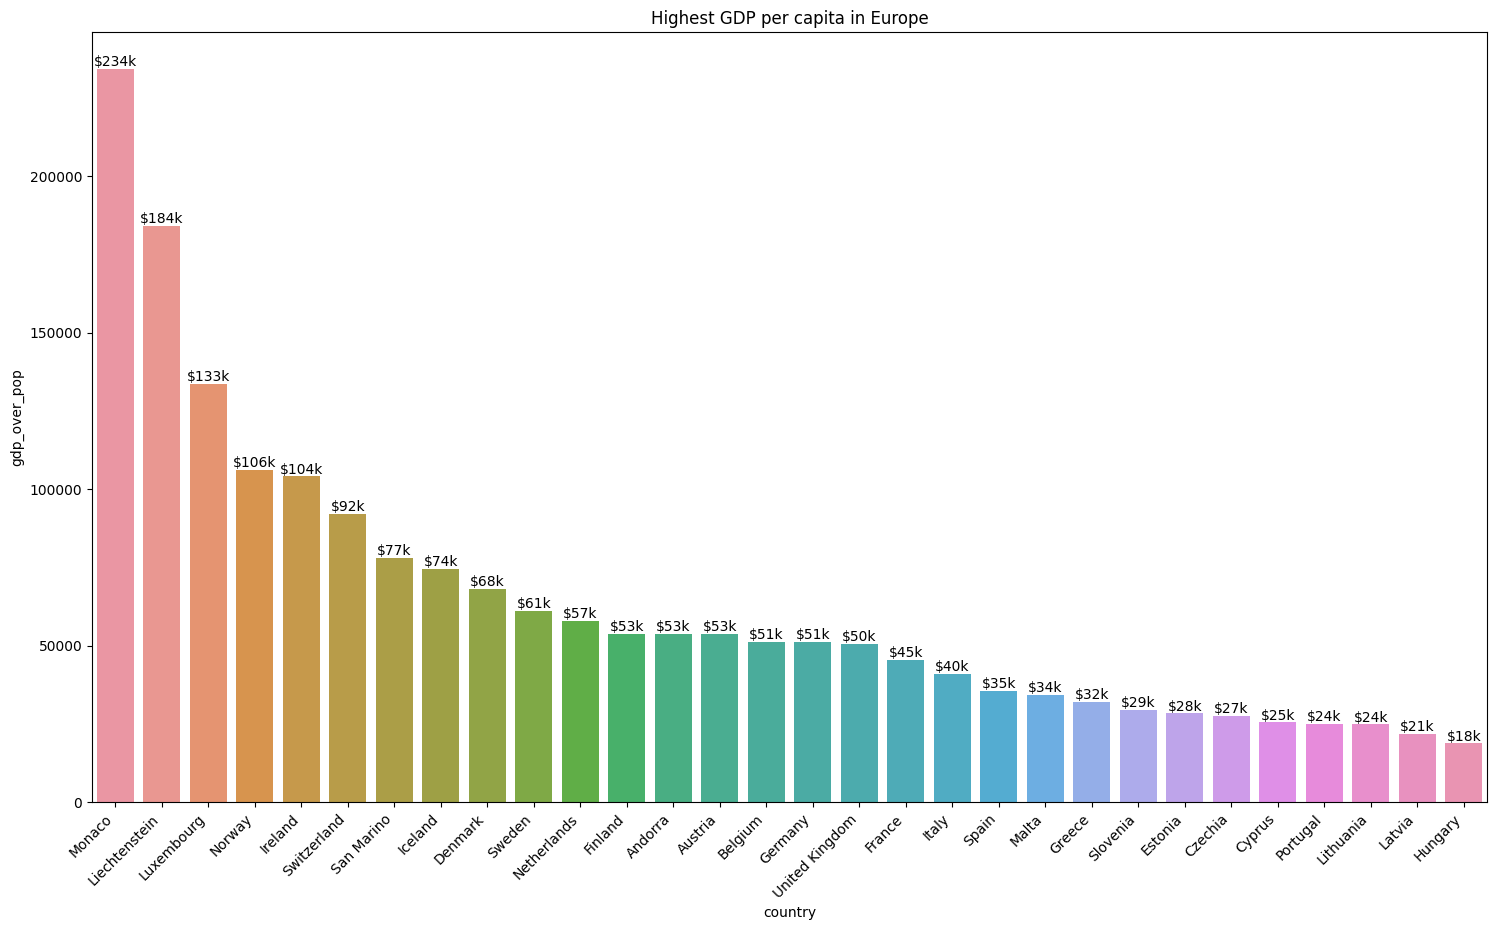

In [12]:
plt.figure(figsize=(18,10))

ax = sns.barplot(data=rich_e, x="country", y="gdp_over_pop")

plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Highest GDP per capita in Europe")

for index, row in rich_e.iterrows():
    ax.text(row.name, row["gdp_over_pop"], "$"+str(int(row["gdp_over_pop"]))[:-3]+"k", color='black', ha='center', va='bottom')

plt.show()



In [13]:
lowest_e = df[df["country"].isin(europe)].groupby("country")["gdp_over_pop"].mean().sort_values().reset_index().head(20)

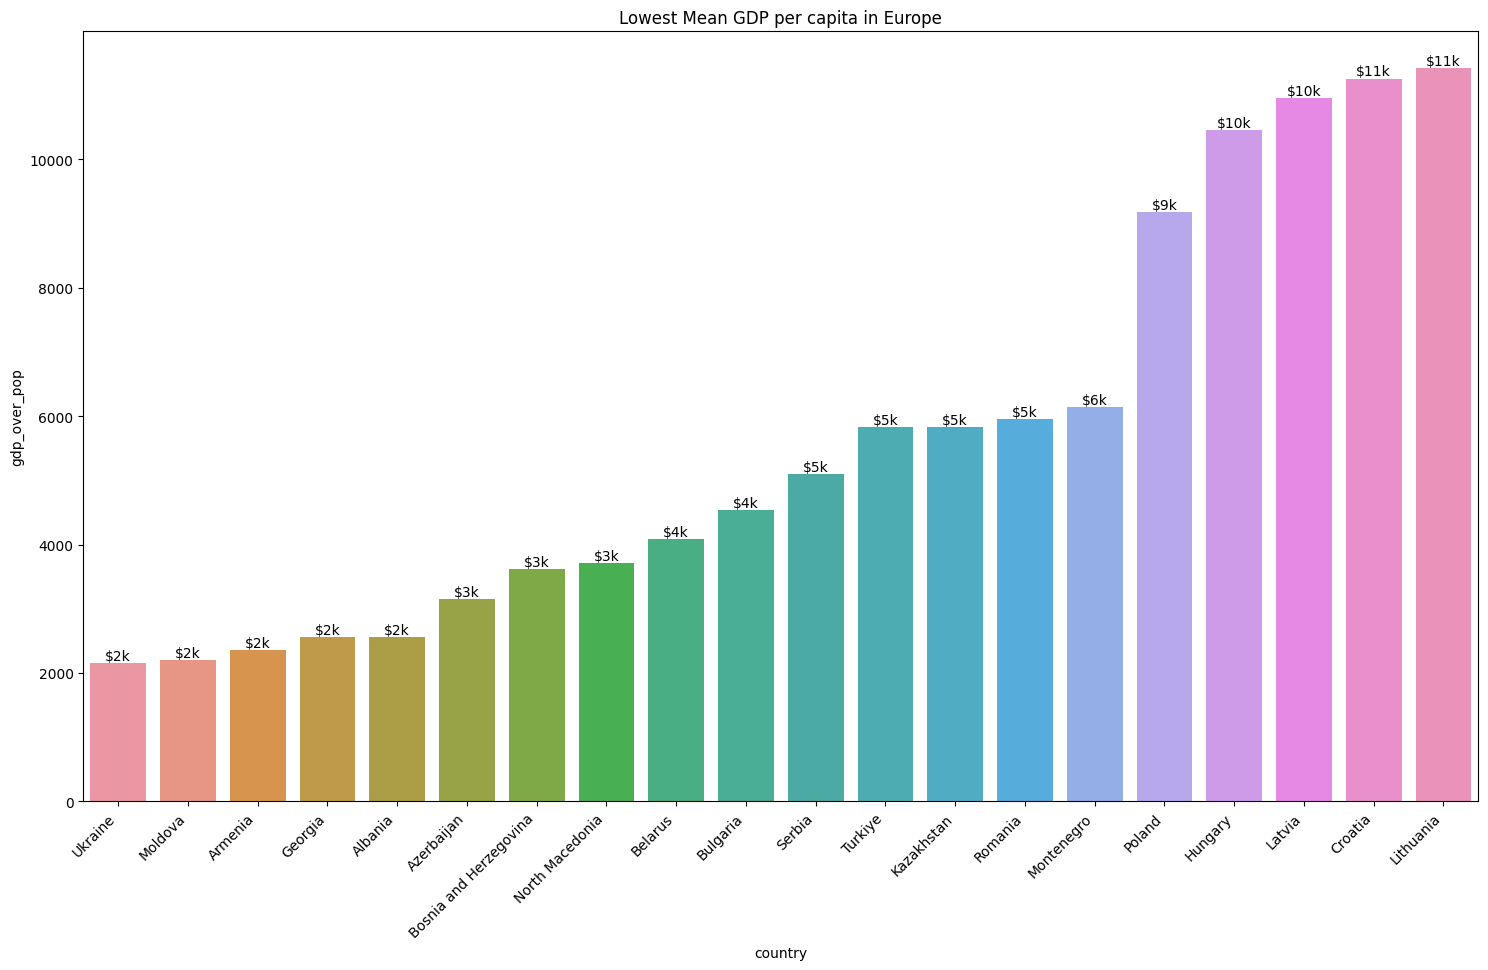

In [14]:
plt.figure(figsize=(18,10))

ax = sns.barplot(data=lowest_e, x="country", y="gdp_over_pop")

plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Lowest Mean GDP per capita in Europe")

for index, row in lowest_e.iterrows():
    ax.text(row.name, row["gdp_over_pop"], "$"+str(int(row["gdp_over_pop"]))[:-3]+"k", color='black', ha='center', va='bottom')

plt.show()


# World Top GDP over Population

In [15]:
world = df.groupby("country")["gdp_over_pop"].max().sort_values(ascending=False).reset_index().head(20)

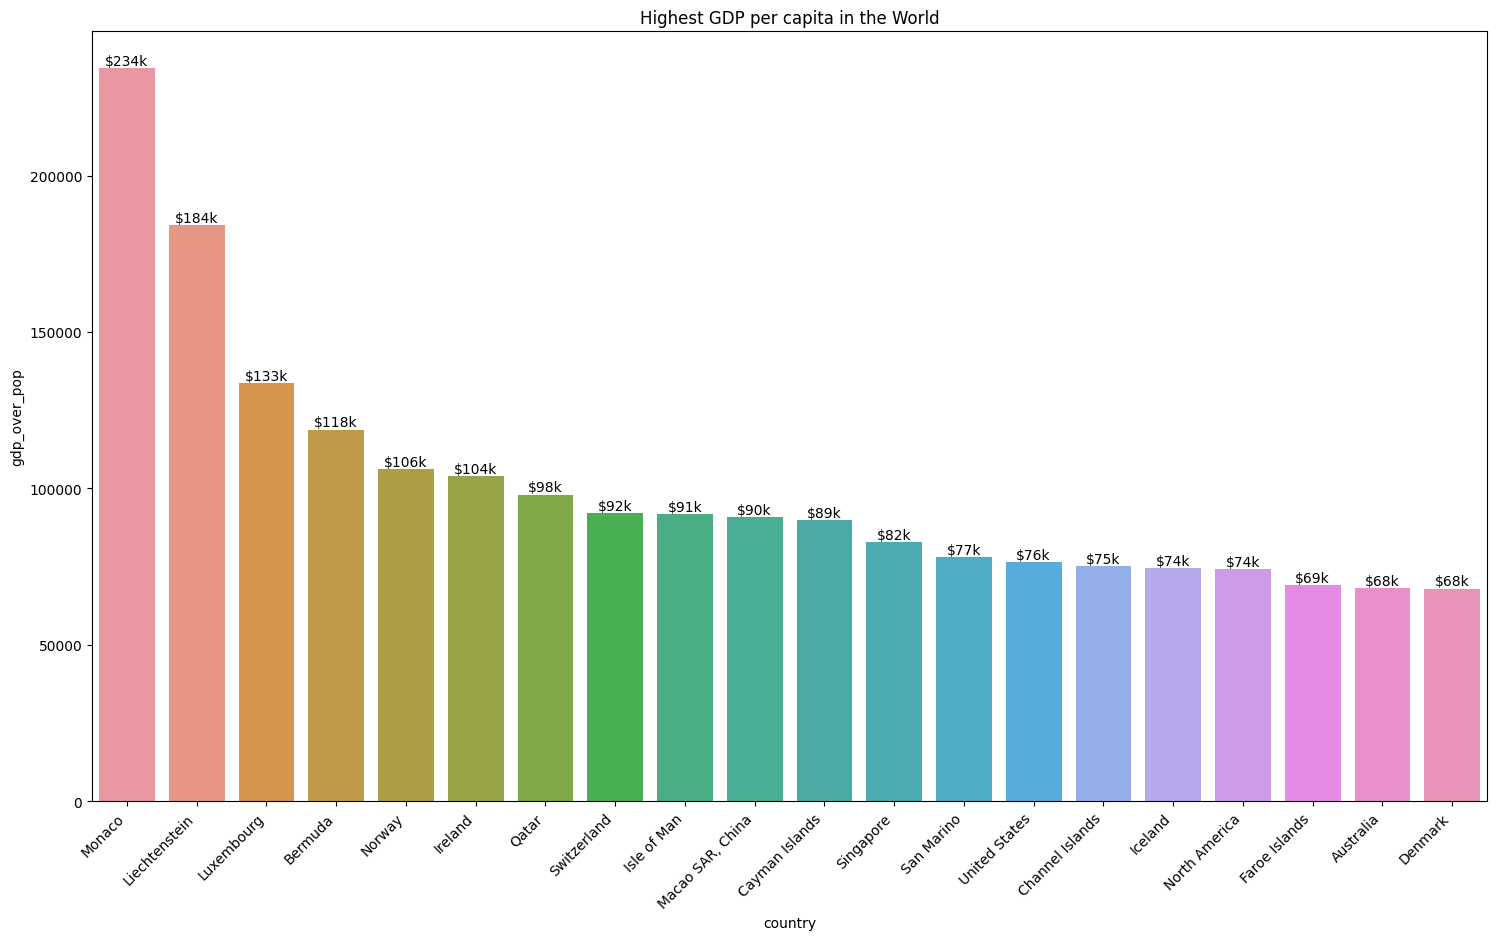

In [16]:

plt.figure(figsize=(18,10))

ax = sns.barplot(data=world, x="country", y="gdp_over_pop")

plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Highest GDP per capita in the World")

for index, row in world.iterrows():
    ax.text(row.name, row["gdp_over_pop"], "$"+str(int(row["gdp_over_pop"]))[:-3]+"k", color='black', ha='center', va='bottom')

plt.show()


**It seems that many any of the leading GDP-per-capita countries are tax havens whose economic data are artificially inflated by corporations**

# World Unemployment

In [17]:
world_unemployment = df.groupby("country")["unemployment_r"].mean().sort_values(ascending=False).reset_index().head(20)
world_unemployment

,country,unemployment_r
0,North Macedonia,29.439406
1,Djibouti,27.927437
2,Eswatini,24.344969
3,Bosnia and Herzegovina,23.737844
4,Montenegro,22.884031
5,South Africa,21.909562
6,Namibia,21.116224
7,"Congo, Rep.",20.379500
8,Libya,19.762906
9,St. Vincent and the Grenadines,19.695000


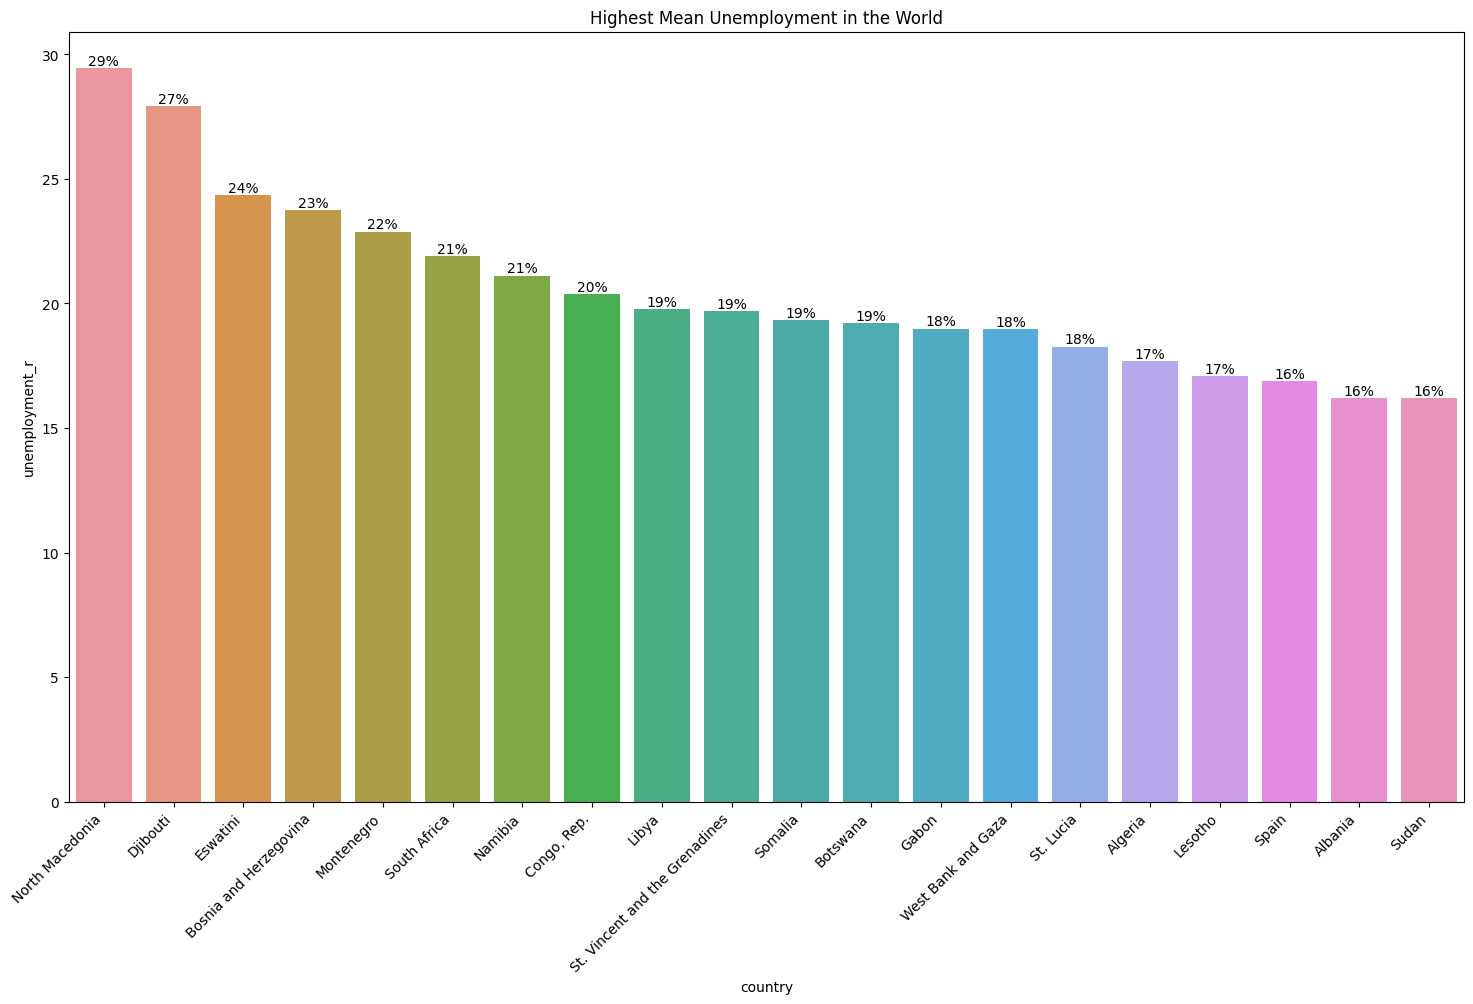

In [18]:
plt.figure(figsize=(18,10))

ax = sns.barplot(data=world_unemployment, x="country", y="unemployment_r")

plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Highest Mean Unemployment in the World")

for index, row in world_unemployment.iterrows():
    ax.text(row.name, row["unemployment_r"], str(int(row["unemployment_r"]))+"%", color='black', ha='center', va='bottom')

plt.show()

In [19]:
world_unemployment_lowest = df.groupby("country")["unemployment_r"].mean().sort_values().reset_index().head(20)
world_unemployment_lowest

,country,unemployment_r
0,Qatar,0.549187
1,Myanmar,0.742667
2,Cambodia,0.748500
3,Chad,0.945250
4,Bahrain,1.174344
5,Thailand,1.305125
6,Benin,1.360313
7,Niger,1.364844
8,Solomon Islands,1.399219
9,Mali,1.484469


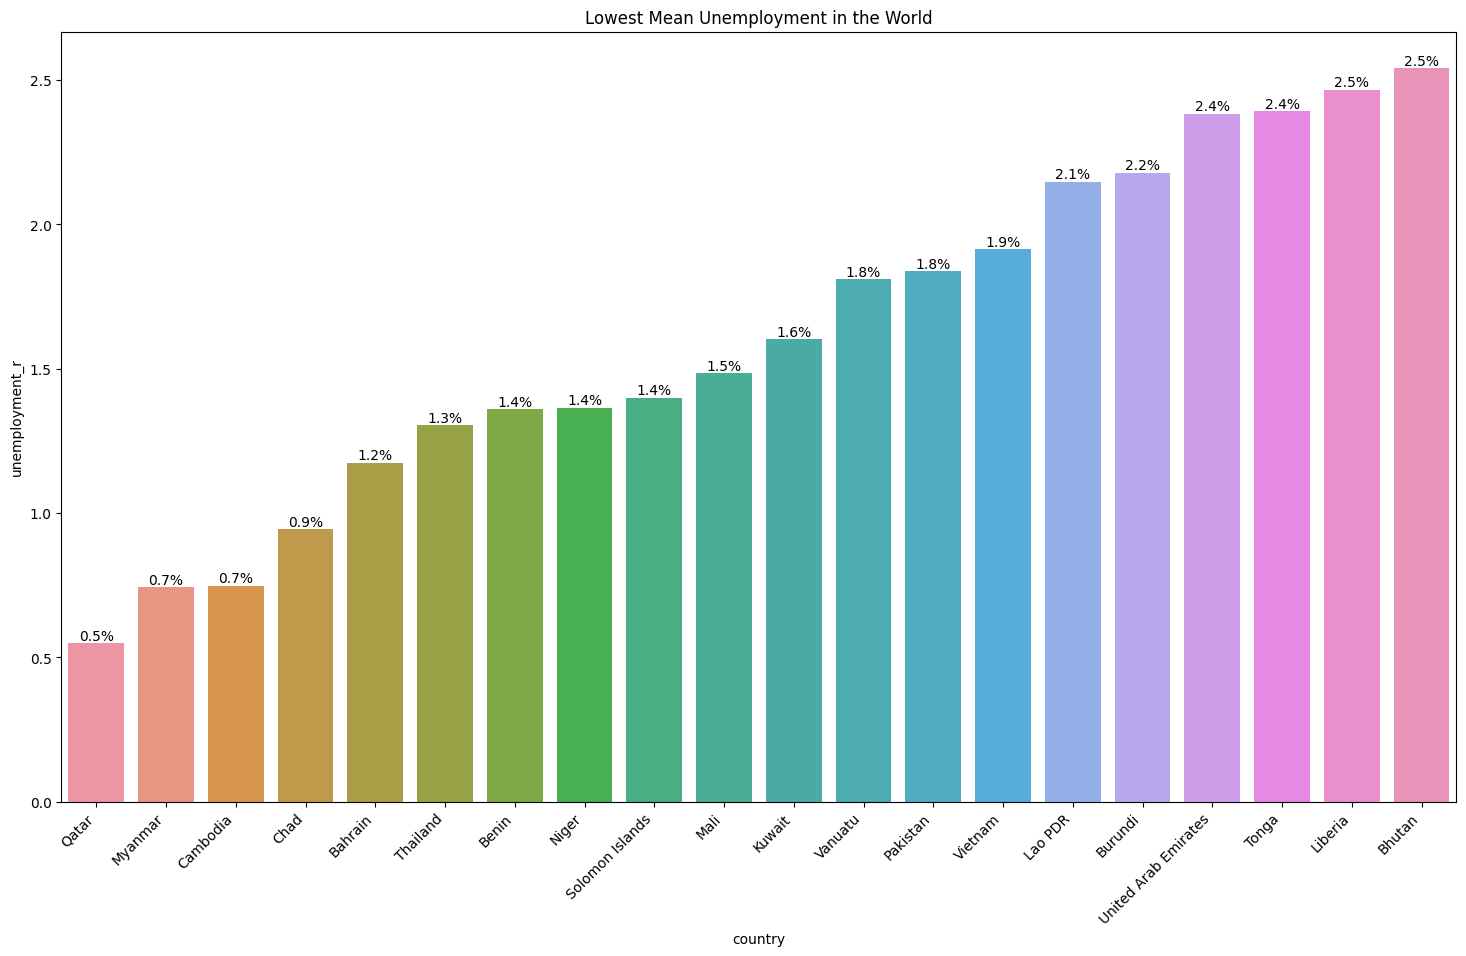

In [20]:
plt.figure(figsize=(18,10))

ax = sns.barplot(data=world_unemployment_lowest, x="country", y="unemployment_r")

plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Lowest Mean Unemployment in the World")

for index, row in world_unemployment_lowest.iterrows():
    ax.text(row.name, row["unemployment_r"], str(round(row["unemployment_r"], 1))+"%", color='black', ha='center', va='bottom')

plt.show()

Interesting...